# Single molecule localization microscopy tutorial

## aims

In this tutorial you will 

1. Read tutorials on SMLM microscopy
2. Answer questionnaire
3.  `advanced` use the ASTROPY python package to localize sources (e.g. single molecules, stars) in two dimensions.
4. Further reading

## installation

Also you need to make sure you have ASTROPY and photutils installed. To check, run:

with pip:

```
pip install astropy
pip install photutils
```

or with conda:
```
conda install astropy
conda install -c conda-forge photutils
```

## Installing and testing Photutils

The easiest way to test your installed version of Photutils is running correctly is to use the photutils.test() function:
```
>>> import photutils
>>> photutils.test()
```

## credits

This tutorial was adapted from: https://photutils.readthedocs.io/en/stable/detection.html


### 1- SMLM microscopy resources

In this part, you should read a basic tutorial on SMLM microscopies. There are standard sources that you can follow for this:

- [The invention of PALM microscopy by Eric Betzig and Harold Hess](https://www.youtube.com/watch?v=GcQ24khZzvU)
- [A course on STORM microscopy by X. Zhuang](https://www.youtube.com/watch?v=w2Qo__sppcI)




### 2- Questionnaire

Plase answer the following questions
- What is the typical resolution gain in SMLM? What does it depend on?
- Mention the main advantages and disadvantages of SMLM over other super-resolution methods.
- Is the same resolution gained in all dimensions?
- What are the properties that fluorophores need to have to be able to achieve SMLM?


In [1]:
# import and example image
import os
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image

hdu = load_star_image()  
data = hdu.data[0:401, 0:401]  
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std))  

(3668.09661145823, 3649.0, 204.41388592022315)


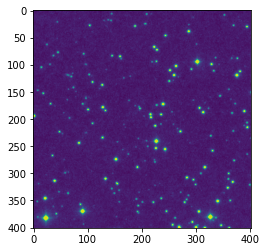

In [2]:
# plot data to make sure everything is fine
import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()

In [3]:
# localize sources and display Table with results
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid ycentroid sharpness  ... sky peak    flux       mag     
--- --------- --------- ---------- ... --- ---- --------- ------------
  1 144.24757 6.3797904 0.58156257 ...   0 6903 5.6976747   -1.8892441
  2 208.66907 6.8205805 0.48348966 ...   0 7896 6.7186388   -2.0682032
  3 216.92614 6.5775933 0.69359525 ...   0 2195 1.6662764  -0.55436758
  4 351.62519 8.5459013 0.48577834 ...   0 6977 5.8970385   -1.9265849
  5 377.51991 12.065501 0.52038488 ...   0 1260 1.1178252  -0.12093477
  6 294.27284 12.737191 0.68021892 ...   0 2059 1.4809613  -0.42635928
  7 85.217728 14.710347 0.62394134 ...   0 1458 1.2457081  -0.23854075
  8 137.94129 17.464718 0.54340548 ...   0 5451 4.6833069   -1.6763815
  9 130.32797 18.678087 0.62723987 ...   0 3432 2.8641222   -1.1424789
 10  143.1105 18.623553 0.52124876 ...   0 6722 5.7556336   -1.9002329
...       ...       ...        ... ... ...  ...       ...          ...
276 292.58712 389.31304  0.3548582 ...   0 9231   4.64095   -1.6665172
277  9

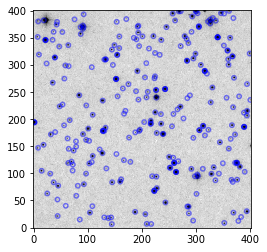

In [4]:
# display raw image and source localizations
import numpy as np
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

### 5- Further reading

Now that you know everything about SMLM microscopy, you can read on the following resources that will help you understand when and how SMLM microscopy is used in real life!

If you did not do the `Advanced` modules, please choose one of these papers and read in detail.

- [See how an SMLM experiment is actually run](https://www.jove.com/v/59387/single-molecule-tracking-microscopy-tool-for-determining-diffusive)
- [Single-particle tracking PALM used to study dynamics of RNA polymerase in bacteria](https://www.pnas.org/content/112/32/E4390.long)
